## Goldsmiths University of London
### Authors...: Sandor Kanda (skand001) + Carlos Alves (cdeol003)
### Created...: 14/02/2023

## Data Mining Coursework

## PART 1: 
### This task is based on the Sonar real data seen previously in class. Several objects which can be rock or metal cylinders are scanned on different angles and under different conditions, with sonar signals. 60 measurements are recorded per columns for each object (one record per object) and these are the predictors called A1, A2, …, A60. The label associated with each record contains the letter "R" if the object is a rock and "M" if it is metal cylinder, and this is the outcome variable called Class. Two datasets are provided to you: a training dataset in the sonar_train.csv file, and a test dataset in the sonar_test.csv file. 

# Setup

In [1]:
# Import relevant libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the Data

In [2]:
# Import the dataframes credit default test and train
df_credit_test = pd.read_csv('creditdefault_test.csv')
df_credit_train = pd.read_csv('creditdefault_train.csv')

In [3]:
# Import the dataframes sonar test and train
df_sonar_test = pd.read_csv('sonar_test.csv')
df_sonar_train = pd.read_csv('sonar_train.csv')

## Take a Quick Look at the Data Structure

In [19]:
# Check the dataframes sonar test and train
df_sonar_test.head().T

,0,1,2,3,4
A1,0.0125,0.053,0.0368,0.0164,0.0216
A2,0.0152,0.0885,0.0279,0.0173,0.0124
A3,0.0218,0.1997,0.0103,0.0347,0.0174
A4,0.0175,0.2604,0.0566,0.007,0.0152
A5,0.0362,0.3225,0.0759,0.0187,0.0608
...,...,...,...,...,...
A57,0.0017,0.0171,0.0009,0.0032,0.0047
A58,0.0041,0.0146,0.0086,0.0035,0.0018
A59,0.0086,0.0134,0.011,0.0056,0.0006
A60,0.0058,0.0056,0.0052,0.004,0.0023


In [5]:
# Display information about the dataframe sonar test
df_sonar_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      69 non-null     float64
 1   A2      69 non-null     float64
 2   A3      69 non-null     float64
 3   A4      69 non-null     float64
 4   A5      69 non-null     float64
 5   A6      69 non-null     float64
 6   A7      69 non-null     float64
 7   A8      69 non-null     float64
 8   A9      69 non-null     float64
 9   A10     69 non-null     float64
 10  A11     69 non-null     float64
 11  A12     69 non-null     float64
 12  A13     69 non-null     float64
 13  A14     69 non-null     float64
 14  A15     69 non-null     float64
 15  A16     69 non-null     float64
 16  A17     69 non-null     float64
 17  A18     69 non-null     float64
 18  A19     69 non-null     float64
 19  A20     69 non-null     float64
 20  A21     69 non-null     float64
 21  A22     69 non-null     float64
 22  A23 

In [6]:
# Provide a statistical summary of the dataframes sonar test and train
df_sonar_test.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,69.0,0.029733,0.023914,0.0039,0.0162,0.0235,0.0363,0.1371
A2,69.0,0.040687,0.032982,0.0006,0.0172,0.0351,0.0523,0.1632
A3,69.0,0.048164,0.038167,0.0026,0.0218,0.0380,0.0623,0.1997
A4,69.0,0.056306,0.044557,0.0062,0.0244,0.0445,0.0707,0.2604
A5,69.0,0.075080,0.054684,0.0076,0.0351,0.0645,0.0974,0.3225
A6,69.0,0.103704,0.062161,0.0201,0.0612,0.0863,0.1354,0.3823
A7,69.0,0.117483,0.062389,0.0145,0.0723,0.1110,0.1487,0.3729
A8,69.0,0.138806,0.079825,0.0098,0.0768,0.1176,0.1927,0.3771
A9,69.0,0.183730,0.114841,0.0323,0.1063,0.1571,0.2423,0.5664
A10,69.0,0.214019,0.149259,0.0113,0.1185,0.1806,0.2668,0.7106


## Data Cleanup

In [7]:
# Check for missing values in the dataframe sonar test
df_credit_test.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

In [8]:
# Check for missing values in the dataframe sonar train
df_credit_train.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

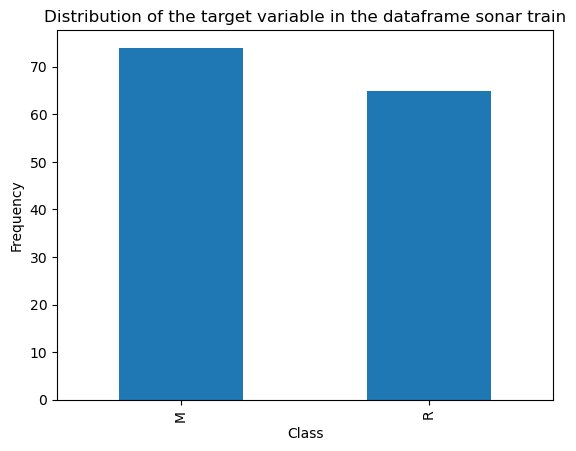

In [9]:
# Plot the distribution of the target variable in the dataframe sonar train
df_sonar_train['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of the target variable in the dataframe sonar train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

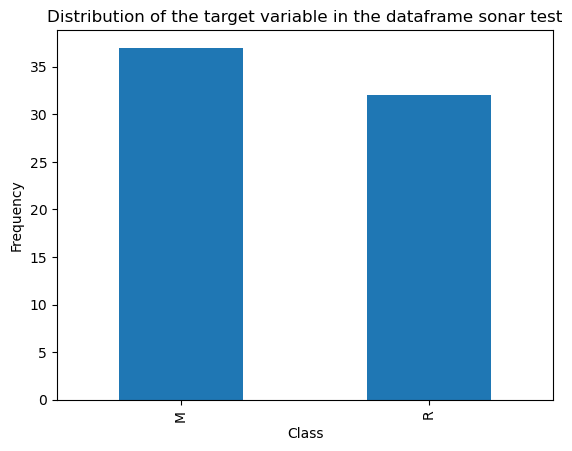

In [10]:
# Plot the distribution of the target variable in the dataframe sonar test
df_sonar_test['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of the target variable in the dataframe sonar test')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Create the feature matrix X_train and the target vector y_train for the dataframe sonar train 
X_train = df_sonar_train.drop('Class', axis=1)
y_train = df_sonar_train['Class']

## Training the K-NN model on the Training set using the euclidean distance metric

### Using the Library from sklearn:

In [12]:
# Import the KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier object using the euclidean distance metric using 1 nearest neighbour
classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)

# Fit the classifier to the data
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Predict the target variable for the dataframe sonar test
y_pred = classifier.predict(df_sonar_test.drop('Class', axis=1))

# Import the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Create the confusion matrix
cm = confusion_matrix(df_sonar_test['Class'], y_pred)

# Create the classification report
cr = classification_report(df_sonar_test['Class'], y_pred)

# Print the confusion matrix
print(cm)

# Print accuracy score with 2 decimal places
print('\n>> Accuracy score: {:.2f}%'.format((cm[0,0] + cm[1,1])/len(y_pred) * 100))


[[34  3]
 [15 17]]

>> Accuracy score: 73.91%


c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Evaluation metrics to measure the performance of the model:

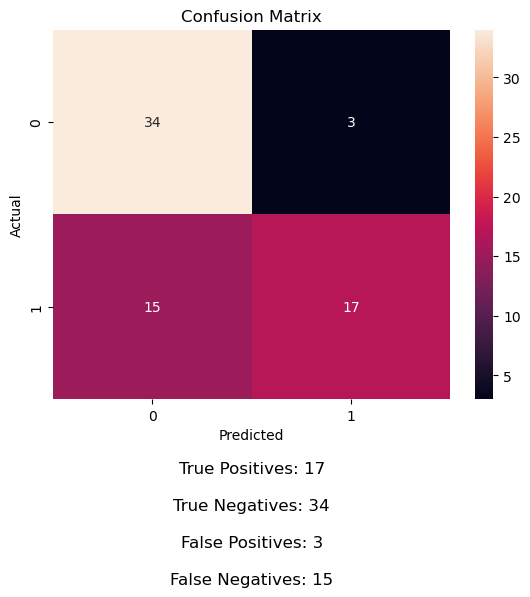

In [14]:
# Plot the confusion matrix with TP, TN, FP, and FN values
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate TP, TN, FP, and FN from the confusion matrix
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

# Create the confusion matrix plot
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add the TP, TN, FP, and FN values to the plot
plt.text(0.5, -0.2, "True Positives: {}".format(TP), size=12, ha="center", 
         transform=plt.gca().transAxes)
plt.text(0.5, -0.3, "True Negatives: {}".format(TN), size=12, ha="center", 
         transform=plt.gca().transAxes)
plt.text(0.5, -0.4, "False Positives: {}".format(FP), size=12, ha="center", 
         transform=plt.gca().transAxes)
plt.text(0.5, -0.5, "False Negatives: {}".format(FN), size=12, ha="center", 
         transform=plt.gca().transAxes)

# Show the plot
plt.show()


## Create a K-Nearest Neighbors classifier without using the scikit-learn library


### Implements the KNN algorithm using Euclidean distance metric:

In [15]:
# Import the numpy library
import numpy as np

# Create the feature matrix X_train and the target vector y_train for the dataframe sonar train
class KNearestNeighbors:

    # Initialize the class with the number of nearest neighbors
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Calculate the euclidean distance between the test point and all training points
        distances = np.sqrt(np.sum((X - self.X_train)**2, axis=1))

        # Sort the distances and return the indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        from collections import Counter
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [16]:
# Create an instance of the KNearestNeighbors class and fit it to your data
classifier = KNearestNeighbors(k=1)
classifier.fit(X_train, y_train)

In [17]:
# Predict method to make predictions on new data
y_pred = classifier.predict(df_sonar_test.drop('Class', axis=1))


### Check that the y_pred has the same results as using the sklearn library

In [18]:
# Import the KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier object using the euclidean distance metric with 1 nearest neighbour
classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)

# Fit the classifier to the data
classifier.fit(X_train, y_train)

# Import the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Create the confusion matrix
cm = confusion_matrix(df_sonar_test['Class'], y_pred)

# Create the classification report
cr = classification_report(df_sonar_test['Class'], y_pred)

# Print the confusion matrix
print(cm)

# Print accuracy score with 2 decimal places
print('\n>> Accuracy score: {:.2f}%'.format((cm[0,0] + cm[1,1])/len(y_pred) * 100))

ValueError: Found input variables with inconsistent numbers of samples: [69, 1]

In [ ]:
# Calculate Accuracy, Precision, Recall, and F1 score
accuracy = (cm[0,0] + cm[1,1])/len(y_pred)
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1] + cm[1,0])
f1_score = 2 * precision * recall / (precision + recall)

# Print the accuracy, precision, recall, and F1 score
print('\n>> Accuracy...: {:.2f}%'.format(accuracy * 100))
print('>> Precision..: {:.2f}%'.format(precision * 100))
print('>> Recall.....: {:.2f}%'.format(recall * 100))
print('>> F1 score...: {:.2f}%'.format(f1_score * 100))



>> Accuracy...: 73.91%
>> Precision..: 85.00%
>> Recall.....: 53.12%
>> F1 score...: 65.38%


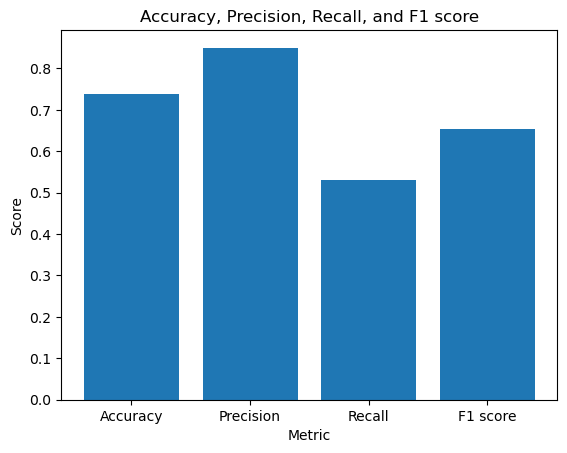

In [ ]:
# Plot the accuracy, precision, recall, and F1 score
import matplotlib.pyplot as plt

# Create the plot
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 score'], [accuracy, precision, recall, f1_score])
plt.title('Accuracy, Precision, Recall, and F1 score')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()
